# Задание

**Цель:** применить на практике базовые ансамблевые методы

**Описание задания:**

В домашнем задании нужно решить задачу классификации наличия болезни сердца у пациентов. Данные для обучения моделей необходимо загрузить самостоятельно с [сайта](https://www.kaggle.com/fedesoriano/heart-failure-prediction). Целевая переменная – наличие болезни сердца (HeartDisease), принимает значения 0 или 1 в зависимости от отсутствия или наличия болезни соответственно. (Подробнее о признаках можно прочесть в описании датасета на сайте. Для выполнения работы не обязательно вникать в медицинские показатели.)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

# 1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)

In [2]:
df = pd.read_csv('Data/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


**Attribute Information**

1. Age: age of the patient [years]
1. Sex: sex of the patient [M: Male, F: Female]
1. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
1. RestingBP: resting blood pressure [mm Hg]
1. Cholesterol: serum cholesterol [mm/dl]
1. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
1. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
1. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
1. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
1. Oldpeak: oldpeak = ST [Numeric value measured in depression]
1. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
1. HeartDisease: output class [1: heart disease, 0: Normal]

# 2. Подготовьте датасет к обучению моделей.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
for col in df.select_dtypes('object').columns:
    print(col, df[col].unique())

Sex ['M' 'F']
ChestPainType ['ATA' 'NAP' 'ASY' 'TA']
RestingECG ['Normal' 'ST' 'LVH']
ExerciseAngina ['N' 'Y']
ST_Slope ['Up' 'Flat' 'Down']


В данных отсутствуют пропуски.

In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### a) Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.

In [6]:
X = pd.get_dummies(df.drop('HeartDisease', axis=1), drop_first=True)
y = df.HeartDisease
X.shape, y.shape

((918, 15), (918,))

### b) Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака).

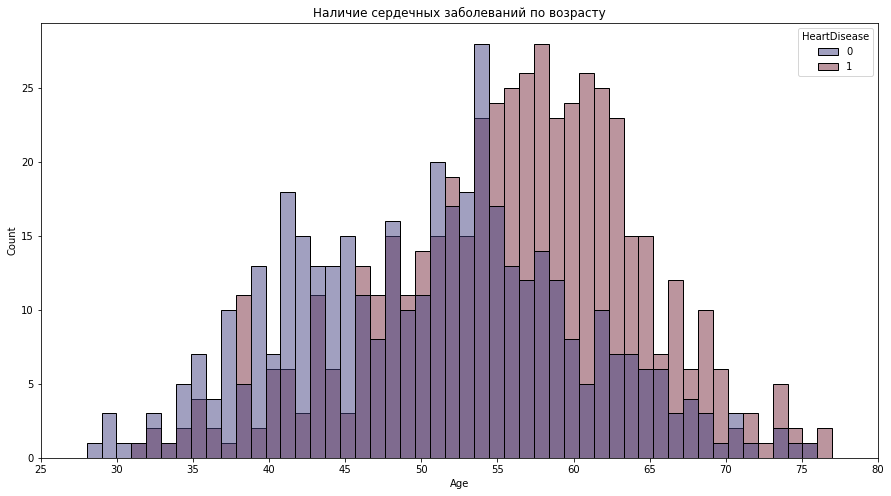

In [7]:
plt.figure(figsize=(15,8))

sns.histplot(data=df, x='Age', hue='HeartDisease', palette='icefire',
            bins=len(df.Age.unique())).set(title="Наличие сердечных заболеваний по возрасту")
plt.xticks(range(25,85,5))
plt.show()

Мы видим, что в данных имеется зависимость наличия сердечных заболеваний от возраста. Начиная с 55 лет преобладает доля людей с сердечными заболеваниями.

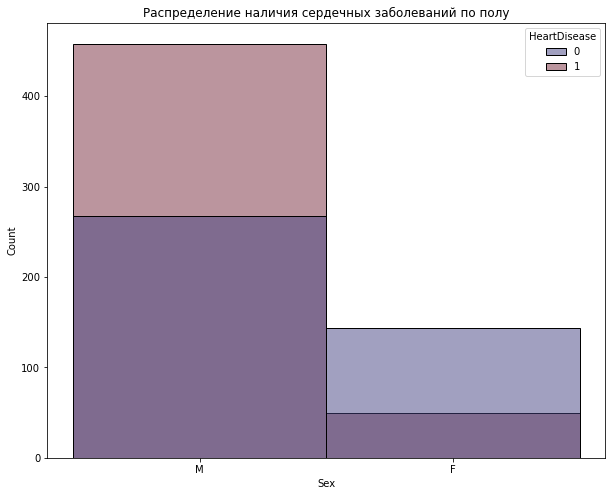

In [8]:
plt.figure(figsize=(10,8))

sns.histplot(data=df, x='Sex', hue='HeartDisease',
             palette='icefire').set(title="Распределение наличия сердечных заболеваний по полу")
plt.show()

Доля мужчин с сердечными заболеваниями преобладает над здоровыми. У женщин наблюдается обратная тенденция. Так же можно заметить, что в датасете преобладают пациенты именно мужского пола.

# 3. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
X_train.shape, X_test.shape

((734, 15), (184, 15))

# 4. Обучите дерево решений на обучающем множестве. Используйте следующие модели:

### a) [tree.DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [10]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### b) [ensemble.RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [11]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# 5. Для тестового множества сделайте предсказание целевой переменной. Выведите метрики для каждой построенной модели с помощью metrics.classification_report.

In [12]:
from sklearn.metrics import classification_report

dtc_scores = classification_report(y_test, dtc.predict(X_test), output_dict=True)
rfc_scores = classification_report(y_test, rfc.predict(X_test), output_dict=True)

print('DecisionTreeClassifier')
print(classification_report(y_test, dtc.predict(X_test)))
print('RandomForestClassifier')
print(classification_report(y_test, rfc.predict(X_test)))

DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.78      0.81      0.79        77
           1       0.86      0.84      0.85       107

    accuracy                           0.83       184
   macro avg       0.82      0.82      0.82       184
weighted avg       0.83      0.83      0.83       184

RandomForestClassifier
              precision    recall  f1-score   support

           0       0.85      0.86      0.85        77
           1       0.90      0.89      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



Метрики для алгоритма случайного леса выше, чем для дерева решений.

# 6. Выведите важность признаков, полученную после обучения модели из п. 4b в виде столбчатой диаграммы. Отсортируйте важность по убыванию.

In [13]:
imp = pd.Series(rfc.feature_importances_)
imp.index = pd.Series(X_train.columns)
imp

Age                  0.088802
RestingBP            0.071584
Cholesterol          0.103851
FastingBS            0.022405
MaxHR                0.117511
Oldpeak              0.112069
Sex_M                0.036660
ChestPainType_ATA    0.033246
ChestPainType_NAP    0.023194
ChestPainType_TA     0.006949
RestingECG_Normal    0.015478
RestingECG_ST        0.009124
ExerciseAngina_Y     0.101613
ST_Slope_Flat        0.108416
ST_Slope_Up          0.149099
dtype: float64

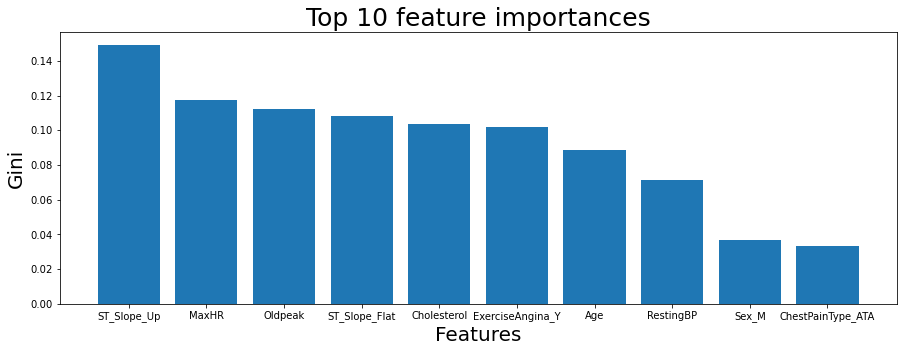

In [14]:
plt.figure(figsize=(15,5))
plt.title('Top 10 feature importances', fontsize=25)
plt.xlabel('Features', fontsize=20)
plt.ylabel('Gini', fontsize=20)
plt.bar(imp.sort_values(ascending=False).head(10).index, imp.sort_values(ascending=False).head(10))
plt.show()

# 7. Обучите бэггинг над моделью из п. 4a. Используйте [ensemble.BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html).

In [15]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(DecisionTreeClassifier(),
                           random_state=42)
bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=42)

### a) Повторите п. 5

In [16]:
bagging_scores = classification_report(y_test, bagging.predict(X_test), output_dict=True)

print('BaggingClassifier')
print(classification_report(y_test, bagging.predict(X_test)))

BaggingClassifier
              precision    recall  f1-score   support

           0       0.72      0.84      0.78        77
           1       0.87      0.77      0.82       107

    accuracy                           0.80       184
   macro avg       0.80      0.81      0.80       184
weighted avg       0.81      0.80      0.80       184



# 8. Обучите стекинг трех моделей: из п. 4a, п. 4b и [svm.LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html). Используйте [ensemble.StackingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html).

In [17]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

st_c = StackingClassifier([('DecisionTreeClassifier', DecisionTreeClassifier(random_state=42)),
                            ('RandomForestClassifier', RandomForestClassifier(random_state=42)),
                            ('LinearSVC', LinearSVC(random_state=42))])
st_c.fit(X_train, y_train)

StackingClassifier(estimators=[('DecisionTreeClassifier',
                                DecisionTreeClassifier(random_state=42)),
                               ('RandomForestClassifier',
                                RandomForestClassifier(random_state=42)),
                               ('LinearSVC', LinearSVC(random_state=42))])

### a) Повторите п. 5

In [18]:
stacking_scores = classification_report(y_test, st_c.predict(X_test), output_dict=True)

print('StackingClassifier')
print(classification_report(y_test, st_c.predict(X_test)))

StackingClassifier
              precision    recall  f1-score   support

           0       0.81      0.86      0.84        77
           1       0.89      0.86      0.88       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



# 9. Сформулируйте выводы по проделанной работе.

### a) Сравните метрики построенных моделей.

In [19]:
pd.DataFrame({'Precision weighted avg': [dtc_scores['weighted avg']['precision'], rfc_scores['weighted avg']['precision'],
                          bagging_scores['weighted avg']['precision'], stacking_scores['weighted avg']['precision']],
             'Recall weighted avg': [dtc_scores['weighted avg']['recall'], rfc_scores['weighted avg']['recall'],
                          bagging_scores['weighted avg']['recall'], stacking_scores['weighted avg']['recall']],
             'F1-score weighted avg': [dtc_scores['weighted avg']['f1-score'], rfc_scores['weighted avg']['f1-score'],
                          bagging_scores['weighted avg']['f1-score'], stacking_scores['weighted avg']['f1-score']]},
            index=['DecisionTreeClassifier', 'RandomForestClassifier',
                        'BaggingClassifier', 'StackingClassifier']).sort_values('Precision weighted avg')

,Precision weighted avg,Recall weighted avg,F1-score weighted avg
BaggingClassifier,0.809519,0.798913,0.800237
DecisionTreeClassifier,0.826873,0.826087,0.826381
StackingClassifier,0.860400,0.858696,0.859139
RandomForestClassifier,0.875272,0.875000,0.875110


### b) Напишите свое мнение, какая модель наилучшая и почему.

Каждая из этих моделей имеет свои преимущества и недостатки, и выбор наилучшей модели зависит от конкретной задачи, данных и других факторов.

*DecisionTreeClassifier* может быть хорошим выбором, если данные имеют явную структуру и легко интерпретируемы. Однако, если дерево решений слишком глубокое, это может привести к переобучению модели.

*RandomForestClassifier* обычно работает хорошо для многоклассовой классификации и в задачах, где данные содержат много шума и выбросов. Он также имеет функцию важности функций, которая позволяет определить, какие признаки наиболее важны для классификации.

*BaggingClassifier* также может быть полезным, если данные содержат шум или выбросы, и он может улучшить производительность модели путем уменьшения дисперсии.

*StackingClassifier* может быть хорошим выбором, если есть несколько моделей, которые хорошо работают на данных, и нужно объединить их для улучшения качества прогнозирования.

На текущем датасете, с учетом параметров моделей по умолчанию, лучшие метрики показала модель случайного леса.